<a href="https://colab.research.google.com/github/akashsaini2527/akash-saini/blob/main/Copy_of_Welcome_To_Colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **TASK 1**

**Titanic Classification**

In [ ]:
import pandas as pd

# Load the dataset
file_path = '/content/drive/MyDrive/titanic.csv'
titanic_data = pd.read_csv(file_path)

# Display the first few rows of the dataset
titanic_data.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**DATA PREPROCESSING**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Handle missing values
titanic_data['Age'].fillna(titanic_data['Age'].median(), inplace=True)
titanic_data['Embarked'].fillna(titanic_data['Embarked'].mode()[0], inplace=True)
titanic_data.drop(columns=['Cabin'], inplace=True)

# Encode categorical variables
label_enc = LabelEncoder()
titanic_data['Sex'] = label_enc.fit_transform(titanic_data['Sex'])
titanic_data['Embarked'] = label_enc.fit_transform(titanic_data['Embarked'])

# Select features and target variable
features = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']
X = titanic_data[features]
y = titanic_data['Survived']

# Normalize numerical features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the shape of the training and testing sets
X_train.shape, X_test.shape, y_train.shape, y_test.shape


((712, 7), (179, 7), (712,), (179,))

**Model Building and Training**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Initialize the model
model = RandomForestClassifier(random_state=42)

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

accuracy, report, conf_matrix


(0.8156424581005587,
 '              precision    recall  f1-score   support\n\n           0       0.83      0.87      0.85       105\n           1       0.80      0.74      0.77        74\n\n    accuracy                           0.82       179\n   macro avg       0.81      0.80      0.81       179\nweighted avg       0.81      0.82      0.81       179\n',
 array([[91, 14],
        [19, 55]]))

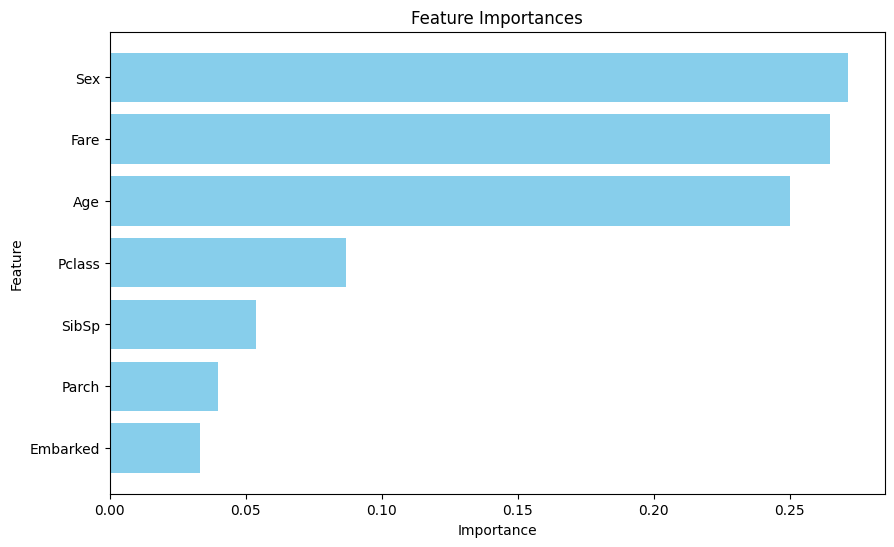

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Get feature importances
feature_importances = model.feature_importances_

# Create a DataFrame for feature importances
features_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances})

# Sort by importance
features_df = features_df.sort_values(by='Importance', ascending=False)

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.barh(features_df['Feature'], features_df['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importances')
plt.gca().invert_yaxis()
plt.show()


# **TASK 2**

**Install required libraries**

In [6]:
!pip install numpy pandas matplotlib scikit-learn keras tensorflow


**Stock Prediction by using LSTM**

         DATE      SP500  NASDAQ.AAL  NASDAQ.AAPL  NASDAQ.ADBE  NASDAQ.ADI  \
0  1491226200  2363.6101     42.3300     143.6800     129.6300      82.040   
1  1491226260  2364.1001     42.3600     143.7000     130.3200      82.080   
2  1491226320  2362.6799     42.3100     143.6901     130.2250      82.030   
3  1491226380  2364.3101     42.3700     143.6400     130.0729      82.000   
4  1491226440  2364.8501     42.5378     143.6600     129.8800      82.035   

   NASDAQ.ADP  NASDAQ.ADSK  NASDAQ.AKAM  NASDAQ.ALXN  ...  NYSE.WYN  NYSE.XEC  \
0    102.2300      85.2200       59.760       121.52  ...    84.370   119.035   
1    102.1400      85.6500       59.840       121.48  ...    84.370   119.035   
2    102.2125      85.5100       59.795       121.93  ...    84.585   119.260   
3    102.1400      85.4872       59.620       121.44  ...    84.460   119.260   
4    102.0600      85.7001       59.620       121.60  ...    84.470   119.610   

   NYSE.XEL  NYSE.XL  NYSE.XOM  NYSE.XRX  NY

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


32951/32951 ━━━━━━━━━━━━━━━━━━━━ 916s 28ms/step - loss: 4.2563e-04
1030/1030 ━━━━━━━━━━━━━━━━━━━━ 18s 17ms/step
257/257 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step


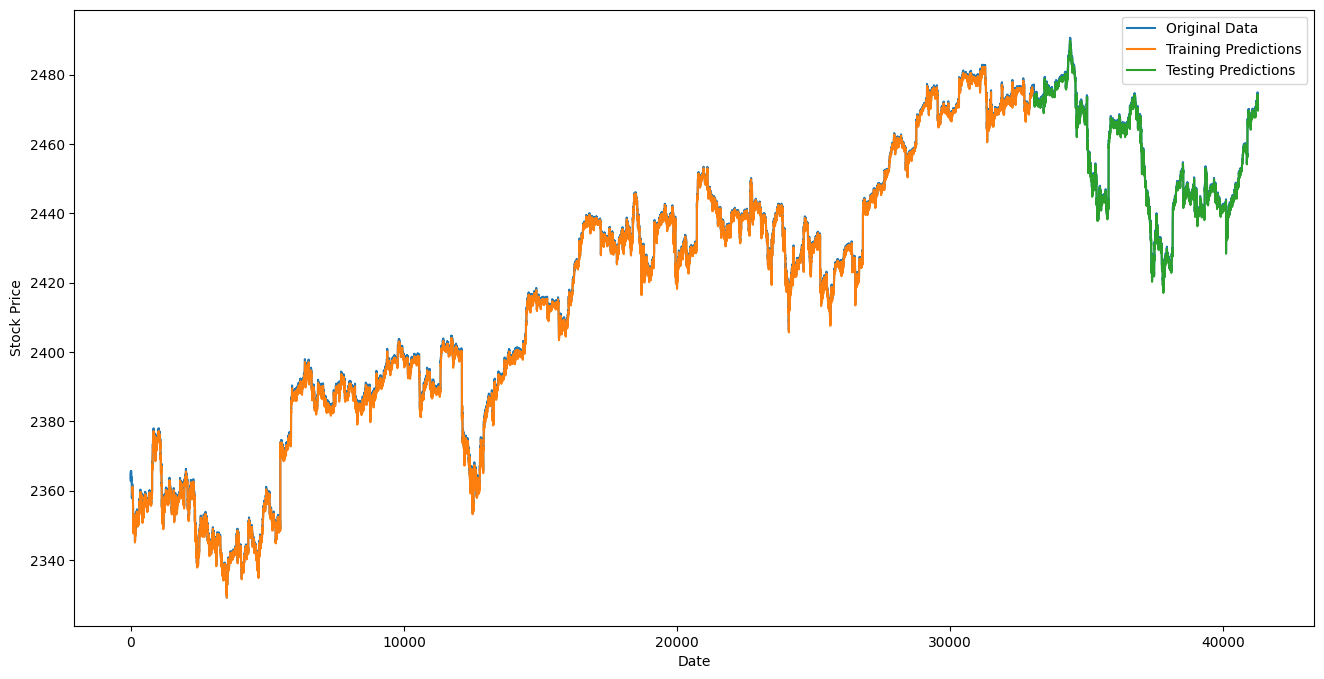

In [8]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense

# Load the data
data = pd.read_csv('/content/drive/MyDrive/data_stocks.csv')

# Display the first few rows of the dataset
print(data.head())

# Preprocess the data
# We will use the 'SP500' column for prediction
data = data[['DATE', 'SP500']]

# Convert the date column to datetime
data['DATE'] = pd.to_datetime(data['DATE'])

# Sort the data by date
data = data.sort_values('DATE')

# Set the date as the index
data.set_index('DATE', inplace=True)

# Normalize the data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data)

# Split the data into training and testing sets
train_size = int(len(scaled_data) * 0.8)
train_data = scaled_data[:train_size]
test_data = scaled_data[train_size:]

# Create a function to create the dataset with the specified look_back
def create_dataset(dataset, look_back=1):
    X, Y = [], []
    for i in range(len(dataset) - look_back - 1):
        a = dataset[i:(i + look_back), 0]
        X.append(a)
        Y.append(dataset[i + look_back, 0])
    return np.array(X), np.array(Y)

# Define look_back period
look_back = 60

# Create the training and testing datasets
X_train, Y_train = create_dataset(train_data, look_back)
X_test, Y_test = create_dataset(test_data, look_back)

# Reshape the input to be [samples, time steps, features]
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

# Build the LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(look_back, 1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train, Y_train, batch_size=1, epochs=1)

# Make predictions
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

# Invert predictions
train_predict = scaler.inverse_transform(train_predict)
Y_train = scaler.inverse_transform([Y_train])
test_predict = scaler.inverse_transform(test_predict)
Y_test = scaler.inverse_transform([Y_test])

# Plot the results
train_predict_plot = np.empty_like(scaled_data)
train_predict_plot[:, :] = np.nan
train_predict_plot[look_back:len(train_predict) + look_back, :] = train_predict

test_predict_plot = np.empty_like(scaled_data)
test_predict_plot[:, :] = np.nan
test_predict_plot[len(train_predict) + (look_back * 2) + 1:len(scaled_data) - 1, :] = test_predict

plt.figure(figsize=(16, 8))
plt.plot(scaler.inverse_transform(scaled_data), label='Original Data')
plt.plot(train_predict_plot, label='Training Predictions')
plt.plot(test_predict_plot, label='Testing Predictions')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.legend()
plt.show()


In [4]:
data.head()

,DATE,SP500,NASDAQ.AAL,NASDAQ.AAPL,NASDAQ.ADBE,NASDAQ.ADI,NASDAQ.ADP,NASDAQ.ADSK,NASDAQ.AKAM,NASDAQ.ALXN,...,NYSE.WYN,NYSE.XEC,NYSE.XEL,NYSE.XL,NYSE.XOM,NYSE.XRX,NYSE.XYL,NYSE.YUM,NYSE.ZBH,NYSE.ZTS
0,1491226200,2363.6101,42.3300,143.6800,129.6300,82.040,102.2300,85.2200,59.760,121.52,...,84.370,119.035,44.40,39.88,82.03,7.36,50.22,63.86,122.000,53.350
1,1491226260,2364.1001,42.3600,143.7000,130.3200,82.080,102.1400,85.6500,59.840,121.48,...,84.370,119.035,44.11,39.88,82.03,7.38,50.22,63.74,121.770,53.350
2,1491226320,2362.6799,42.3100,143.6901,130.2250,82.030,102.2125,85.5100,59.795,121.93,...,84.585,119.260,44.09,39.98,82.02,7.36,50.12,63.75,121.700,53.365
3,1491226380,2364.3101,42.3700,143.6400,130.0729,82.000,102.1400,85.4872,59.620,121.44,...,84.460,119.260,44.25,39.99,82.02,7.35,50.16,63.88,121.700,53.380
4,1491226440,2364.8501,42.5378,143.6600,129.8800,82.035,102.0600,85.7001,59.620,121.60,...,84.470,119.610,44.11,39.96,82.03,7.36,50.20,63.91,121.695,53.240


#**TASK 4**

**AB Testing**

**Step 1: Load and Inspect the Datasets**

In [9]:
import pandas as pd

# Load the datasets
ab_data = pd.read_csv('/content/drive/MyDrive/ab_data.csv')
countries = pd.read_csv('/content/drive/MyDrive/countries.csv')

# Display the first few rows of each dataset
print(ab_data.head())
print(countries.head())

# Display basic information about the datasets
print(ab_data.info())
print(countries.info())


   user_id timestamp      group landing_page  converted
0   851104   11:48.6    control     old_page          0
1   804228   01:45.2    control     old_page          0
2   661590   55:06.2  treatment     new_page          0
3   853541   28:03.1  treatment     new_page          0
4   864975   52:26.2    control     old_page          1
   user_id country
0   834778      UK
1   928468      US
2   822059      UK
3   711597      UK
4   710616      UK
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294480 entries, 0 to 294479
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   user_id       294480 non-null  int64 
 1   timestamp     294480 non-null  object
 2   group         294480 non-null  object
 3   landing_page  294480 non-null  object
 4   converted     294480 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 11.2+ MB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 290586 entries, 0 to 290585
Data 

**Step 2: Clean and Preprocess the Data**

In [10]:
# Check for missing values
print(ab_data.isnull().sum())
print(countries.isnull().sum())

# Check for duplicates in the ab_data
print(ab_data.duplicated().sum())

# Drop duplicates if any
ab_data.drop_duplicates(inplace=True)

# Merge the datasets if necessary
ab_data = ab_data.merge(countries, on='user_id', how='left')

# Display the first few rows after merging
print(ab_data.head())


user_id         0
timestamp       0
group           0
landing_page    0
converted       0
dtype: int64
user_id    0
country    0
dtype: int64
0
   user_id timestamp      group landing_page  converted country
0   851104   11:48.6    control     old_page          0      US
1   804228   01:45.2    control     old_page          0      US
2   661590   55:06.2  treatment     new_page          0      US
3   853541   28:03.1  treatment     new_page          0      US
4   864975   52:26.2    control     old_page          1      US


**Step 3: Exploratory Data Analysis (EDA)**

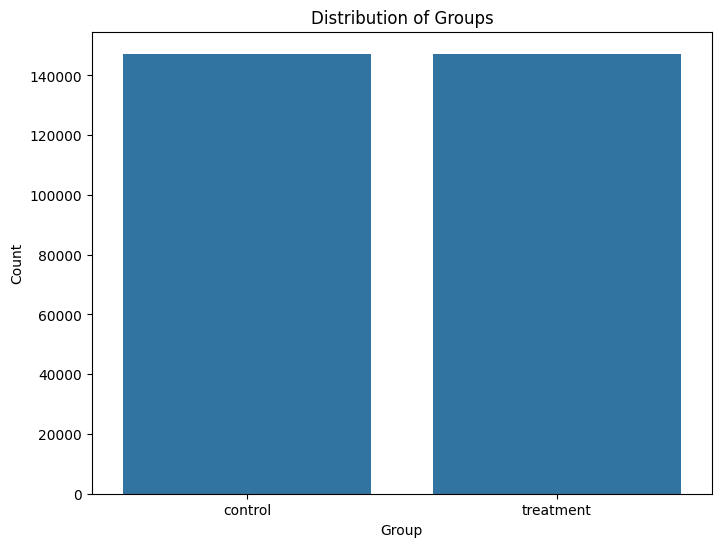

group
control      0.120399
treatment    0.118916
Name: converted, dtype: float64


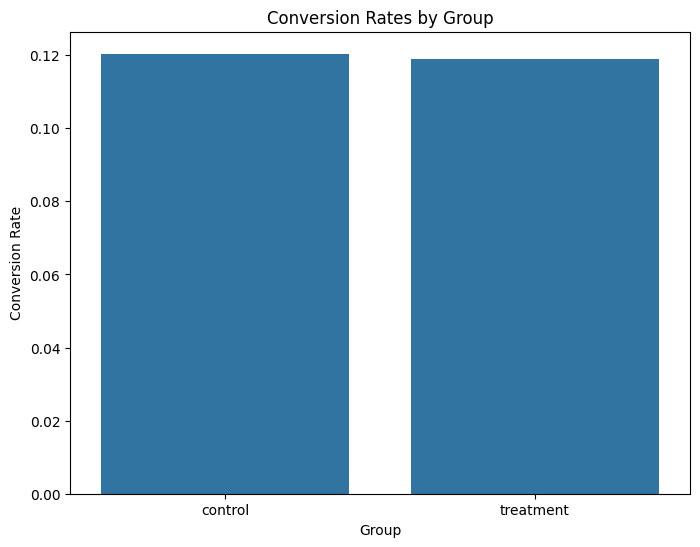

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualize the distribution of the groups
plt.figure(figsize=(8, 6))
sns.countplot(data=ab_data, x='group')
plt.title('Distribution of Groups')
plt.xlabel('Group')
plt.ylabel('Count')
plt.show()

# Compare the conversion rates between the groups
conversion_rates = ab_data.groupby('group')['converted'].mean()
print(conversion_rates)

# Visualize the conversion rates
plt.figure(figsize=(8, 6))
sns.barplot(x=conversion_rates.index, y=conversion_rates.values)
plt.title('Conversion Rates by Group')
plt.xlabel('Group')
plt.ylabel('Conversion Rate')
plt.show()


**Conduct a hypothesis test**

In [12]:
from scipy import stats

# Create separate dataframes for control and treatment groups
control_group = ab_data[ab_data['group'] == 'control']['converted']
treatment_group = ab_data[ab_data['group'] == 'treatment']['converted']

# Perform a t-test to compare the conversion rates
t_stat, p_value = stats.ttest_ind(control_group, treatment_group)
print(f"T-statistic: {t_stat:.4f}")
print(f"P-value: {p_value:.4f}")

# Interpret the results
alpha = 0.05  # Significance level
if p_value < alpha:
    print("Reject the null hypothesis: There is a significant difference between the control and treatment groups.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference between the control and treatment groups.")


T-statistic: 1.2396
P-value: 0.2151
Fail to reject the null hypothesis: There is no significant difference between the control and treatment groups.
